In [51]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt



In [53]:
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data (1).csv


In [58]:
import pandas as pd

# Replace the exact filename if needed
df = pd.read_csv("car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [59]:
df.dropna(inplace=True)


In [60]:
X = df[['Present_Price', 'Driven_kms', 'Owner', 'Year']]
y = df['Selling_Price']


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [63]:
predictions = model.predict(X_test)
print("Predictions:", predictions)


Predictions: [ 2.10916346  8.84523135  4.95054983 -1.14759662 10.14230184  5.981295
  2.15090534  1.44132638  2.10250345  6.0895694   7.7493921   1.30279026
  7.19465357  2.51919518  5.38475327  3.03998004  1.0452927  11.86927839
  2.52823727  3.19517764  0.93941504  6.67021791  4.97496881  2.28893765
  1.48309738  3.62562561  5.63247228  2.64022668  3.00607845  2.59441556
  0.96530285  8.16383105 -0.22318912  2.1072456   7.36678419  4.57594267
  8.08585858  8.43901454  2.79901137  8.83444531  4.20969177  3.03893702
  4.28040801  1.37520388  5.82919438  1.1643297   7.9775779  11.02198021
  2.92078149  3.61051086  5.39251886  3.01216599 19.93213223 15.34729053
  6.2122404   8.82778656  4.35291824  7.79276349  1.50420002  6.20960172
  0.84612182]


In [64]:
score = model.score(X_test, y_test)
print("Model Accuracy (R² score):", score)


Model Accuracy (R² score): 0.8209051135122607


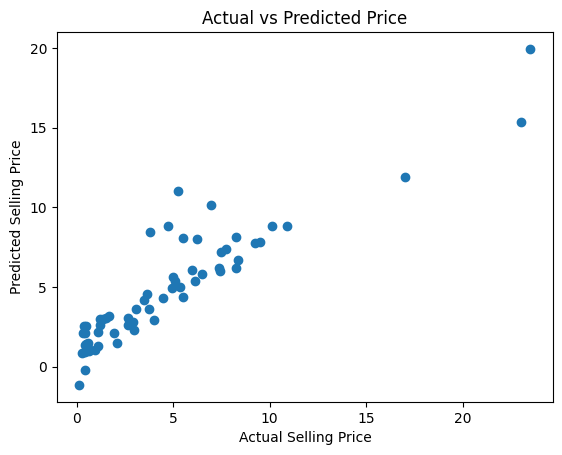

In [65]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [66]:
import joblib
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")


R² Score: 0.8209051135122607
Mean Absolute Error: 1.3943701771121877


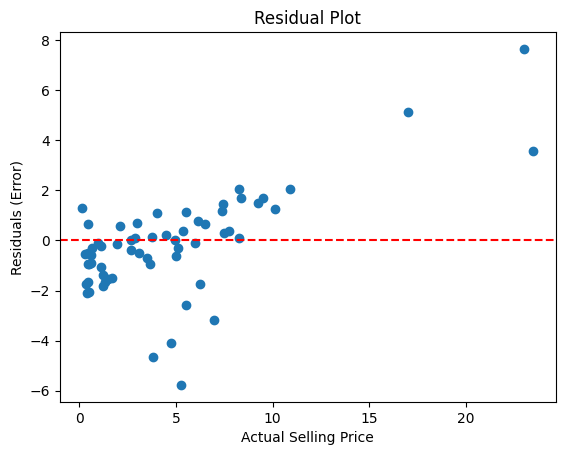

In [68]:
residuals = y_test - predictions

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot")
plt.show()


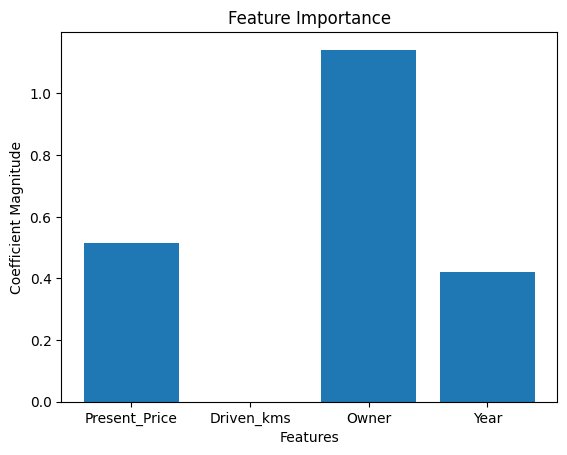

In [69]:
import numpy as np

features = X.columns
importance = np.abs(model.coef_)

plt.bar(features, importance)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance")
plt.show()


In [70]:
import joblib
joblib.dump(model, 'car_price_predictor.pkl')


['car_price_predictor.pkl']